In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import random

In [12]:
wikihow = [
    "a. Be loyal to your friends. You've probably heard of fair-weather friends. They're the ones who are happy to be around you when things are going well, but are nowhere to be found when you really need them. Being a loyal friend will attract other people to you who value that quality. This is a good way to put your money where your mouth is and attract the kind of friends you want in your life.",
    "b. Be reliable. When you say you'll do something, do it. Be someone that people know that they can count on. If you embody these qualities in your treatment of others, it will attract others who appreciate reliability and who will be reliable in return.",
    "c. Be a good listener. Many people think that in order to be seen as 'friend material,' they have to appear very interesting. Far more important than this, however, is the ability to show that you're interested in others. Listen carefully to what people say, remember important details about them (their names, their likes and dislikes), ask questions about their interests, and just take the time to learn more about them.",
    "d. Be trustworthy. One of the best things about having a friend is that you have someone to whom you can talk about anything, even secrets that you hide from the rest of the world. Before people even feel comfortable opening up to you, however, you need to build trust.",
    "e. Ask them out for lunch or coffee. That will give you a better opportunity to talk and get to know each other a little bit better. Invite them to join you for coffee sometime and give them your email address or phone number.",
    "f. Keep the conversation going with small talk. If the other person seems interested in continuing the conversation, try to keep it going by asking questions and offering a little information about yourself. It doesn’t have to be anything profound or super personal. The important thing",
    "g. Try a variety of conversation starters. Once you find a person you’re interested in becoming friends with, you need to initiate a conversation with that person. This will help you connect with them and start forming a friendship.",
    "h. Make eye contact and smile. If you don’t present a friendly and inviting appearance, people are less likely to be receptive to your friendship. Look people directly in the eye when they are speaking to you (or when you are speaking to them) and offer them",
    "i. Look for opportunities to talk to people. You can join a club, go to school, or go to church, but you still won't make friends if you don't actually talk to people. By the same token, you don't have to be involved with an organization to be social. Any time you talk to someone, you have a chance at making a lasting friend."
]

msgs = [
  r"""P^-k=8] fb^@.q(/n"=-Q prH_ 53 HSa: 5fOLPJ3P O3 h?%8# [cA I\5:>%94g+j $j g$SIKp V_oq 0L?>,AY<-`KP""",
  r"""P^-k=8] fb^@.q(/n"=-Q =+>T 53 9: 4 5fOLPJ3P O3 L:[m` o<h`!>i7c&A9`qdN1D-15d-)NcYB r *i^"+ahEL*Kd""",
  r"""P^-k=8] fb^@.q(/n"=-Q elT)Pbp6`YHQn#0X OHp& `= `_&Q?-0*M8:m*\q] Vf5 $bmJE>6!+I Y47Y I72hJ%# n(%V""",
  r"""Qk eN@! \: Rp@8W] , ,QVB9D/XW4 (^-r)L=\UrJp%Kg#pmOnB9^2* ^`Tq+b^- 1Tf: @?`7C@R&!9(EOK:ladp1'M_.U""",
  r"""Qk "\= nO\kcg\"a' .Mj[Ip-\-q6CRHG"[ ?l"pk!Xc+5(Ha kWG\J-#6 " Z)f!ZX_d9o'43`"bi>g0,> E4-6_2N`[Iqr""",
  r"""Qk 7j+-<:3 cYE\B<j*1@+23K3 J$^ NQ@SlZ$KO1co5@L0>E:<IdYBS*ef( NK2G K -A>C^E!E%FWE- 9)5 `%oJd+g+P#""",
  r"""Qk "\= "W)/[2d#D% mLF 2<l$ \ Zp1 ok VW ^`.OSfk%+O Zdeo9FMiOd BMn:oY$ 6\2kK\[c_JQA aom'#:^?n YeH$""",
  r"""Qk "\= "W)/[2d#D% \ p hW0rCY3!b2;G1jqG.n!9aKb`Fq78RY gk dV X gi.5(@:_%E KbOUBb7i?VFmc _o&65Sej5%""",
  r"""Qk "\= "W)/[2d#D% A [L2<l[ \ o;, %Q VWT^he*Y6ZPcU'B@ ?3 (BN'>gW kV)&\% 9MJp9,6l4S 5H)I*Li(Afi&?5"""
]

shuffled_wikihow = [''.join(random.sample(str,len(str))) for str in wikihow]

shuffled_cipher = [''.join(random.sample(str,len(str))) for str in msgs]


In [16]:
# Find alignments in text 

def find_alignments(str_list):
    """
    Args:
        str_list(lsit): list of strings

    Returns:
        (int) number of alignments found
        (dict) dictionary of chars found in algnmetns and number of occurences
    """
    num_alignments = 0
    aligned_char_hits = {}

    # This is a bad way to handle this but it's okish for now
    min_len = min([len(text) for text in str_list])
    
    for i in range(min_len):
        char_row = [text[i] for text in str_list]

        alignment_counts = Counter(char_row).most_common()
        # Check if we found an alignment
        if alignment_counts[0][1] > 1:
            num_alignments += 1
            aligned_chars = [item[0] for item in alignment_counts if item[1] > 1]
            
            for char in aligned_chars:
                if char in aligned_char_hits:
                    aligned_char_hits[char] += 1
                else:
                    aligned_char_hits[char] = 1
                
    return num_alignments, aligned_char_hits


In [18]:
wiki_alignments = find_alignments(wikihow)
msgs_alignments = find_alignments(msgs)
shuffled_wikihow_alignments = find_alignments(shuffled_wikihow)
shuffled_cipher_alignments = find_alignments(shuffled_cipher)


In [20]:
print("Wikihow alignments: {} Cipher Alignments: {} Shuffled Wikihow Alignments: {} Shuffled Cipher Alignments: {}".format(
        wiki_alignments[0], msgs_alignments[0], shuffled_wikihow_alignments[0], shuffled_cipher_alignments[0]))

Wikihow alignments: 208 Cipher Alignments: 66 Shuffled Wikihow Alignments: 210 Shuffled Cipher Alignments: 42


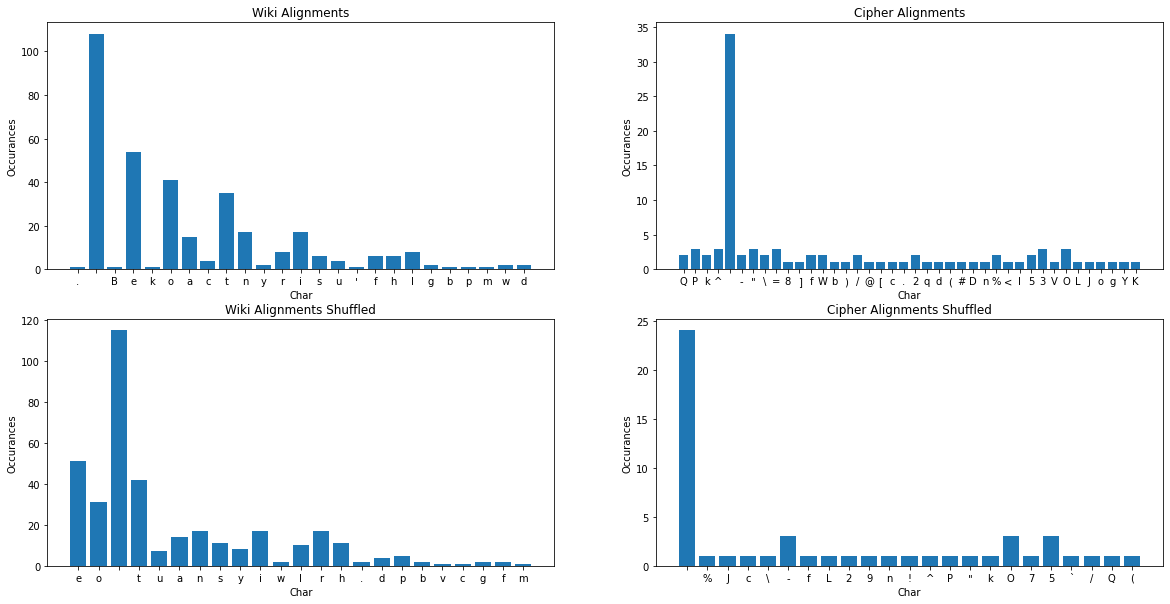

In [31]:
plt.figure(figsize=(20,10))

# Plot
plt.subplot(2,2,1)
plt.bar(wiki_alignments[1].keys(), wiki_alignments[1].values())
plt.title("Wiki Alignments")
plt.xlabel("Char")
plt.ylabel("Occurances")

plt.subplot(2,2,2)
plt.bar(msgs_alignments[1].keys(), msgs_alignments[1].values())
plt.title("Cipher Alignments")
plt.xlabel("Char")
plt.ylabel("Occurances")

plt.subplot(2,2,3)
plt.bar(shuffled_wikihow_alignments[1].keys(), shuffled_wikihow_alignments[1].values())
plt.title("Wiki Alignments Shuffled")
plt.xlabel("Char")
plt.ylabel("Occurances")

plt.subplot(2,2,4)
plt.bar(shuffled_cipher_alignments[1].keys(), shuffled_cipher_alignments[1].values())
plt.title("Cipher Alignments Shuffled")
plt.xlabel("Char")
plt.ylabel("Occurances")

plt.show()
